In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('/content/BIKE DETAILS.csv')


In [4]:
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
#1.What is the range of selling prices in the dataset
df1["selling_price"].max() - df1["selling_price"].min()

755000

In [6]:
#2.What is the median selling price for bikes in the dataset
df1["selling_price"].median()

45000.0

In [7]:
#3.What is the most common seller type
df1["seller_type"].mode()[0]

'Individual'

In [8]:
#4.How many bikes have driven more than 50,000 kilometers?
(df1["km_driven"]>50000).sum()

np.int64(170)

In [9]:
#5.What is the average km_driven value for each ownership type?
df1.groupby("owner")["km_driven"].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [10]:
#6.What proportion of bikes are from the year 2015 or older?
count_2015_or_older=(df1['year']<=2015).sum()
total_bikes = len(df1)
proportion = count_2015_or_older / total_bikes
print(proportion)

0.5664467483506126


In [11]:
#7.What is the trend of missing values across the dataset
df1.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [12]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
df1[df1["ex_showroom_price"]==df1["ex_showroom_price"].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [13]:
#9.What is the total number of bikes listed by each seller type
df1.groupby("seller_type")["name"].count()

,name
seller_type,
Dealer,6
Individual,1055


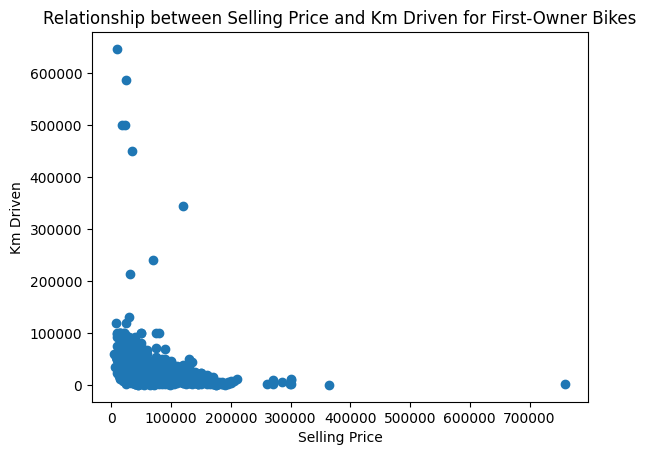

In [14]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_df = df1[df1["owner"] == "1st owner"]
plt.scatter(first_owner_df["selling_price"], first_owner_df["km_driven"])
plt.xlabel("Selling Price")
plt.ylabel("Km Driven")
plt.title("Relationship between Selling Price and Km Driven for First-Owner Bikes")
plt.show()

In [15]:
#11.Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df1["km_driven"].quantile(0.25)
Q3 = df1["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df1[(df1["km_driven"] < lower_bound) | (df1["km_driven"] > upper_bound)]
print("Number of outliers:", len(outliers))
print(outliers[["km_driven"]])



Number of outliers: 39
      km_driven
91       500000
93       130000
115      120000
135       90000
154       99000
184      100000
363      646000
470       95000
474       90000
477      585659
511      100000
535      100000
548      100000
575      340000
592      101000
598      120000
610      100000
630       98000
642      880000
668       93000
687      100000
695      100000
712      100000
714      240000
716      100000
726      100000
773       95000
782      100000
797      345000
830      100000
872       93000
877      450000
901      100000
903      127000
908       89000
930      100000
1039     213000
1056     500000
1060      92233


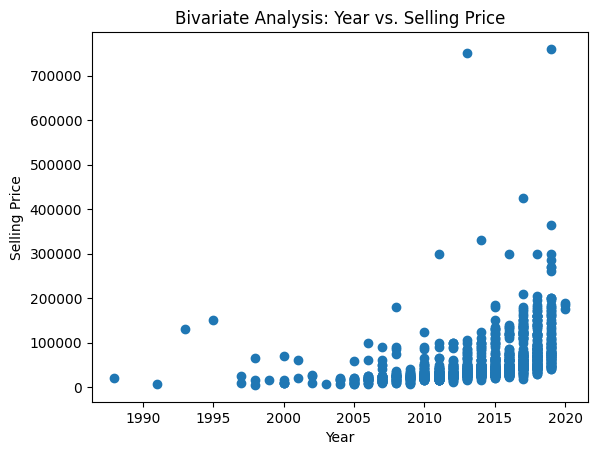

In [16]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price?
plt.scatter(df1["year"], df1["selling_price"])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Bivariate Analysis: Year vs. Selling Price")
plt.show()

In [17]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
import datetime
current_year = datetime.datetime.now().year
df1["Age"] = current_year - df1["year"]
avg_price_by_age = df1.groupby("Age")["selling_price"].mean().reset_index()
avg_price_by_age.rename(columns={"selling_price": "Avg_Selling_Price"}, inplace=True)
print(avg_price_by_age)

    Age  Avg_Selling_Price
0     5      183333.333333
1     6      119689.511628
2     7       87660.374046
3     8       78894.736842
4     9       58469.018692
5    10       56500.000000
6    11       48668.131868
7    12       51136.986301
8    13       35748.400000
9    14       35655.721311
10   15       31793.333333
11   16       22267.857143
12   17       34289.285714
13   18       24927.586207
14   19       23380.000000
15   20       16978.571429
16   21       15100.000000
17   22        8000.000000
18   23       20666.666667
19   24       40000.000000
20   25       20833.333333
21   26       15000.000000
22   27       28333.333333
23   28       17500.000000
24   30      150000.000000
25   32      130000.000000
26   34        6000.000000
27   37       20000.000000


In [18]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
import pandas as pd

# Step 1: Calculate average & std selling price per Year
year_stats = df1.groupby("year")["selling_price"].agg(["mean", "std"]).reset_index()

# Step 2: Merge stats back to original dataframe
df1 = df1.merge(year_stats, on="year", how="left")

# Step 3: Find bikes priced significantly above average (e.g., > mean + 1 std)
df_above_avg = df1[df1["selling_price"] > df1["mean"] + df1["std"]]

# Optional: Keep only useful columns
df_above_avg = df_above_avg[["name", "year", "selling_price", "mean", "std"]]

print(df_above_avg)


                                     name  year  selling_price           mean  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714   
13                          Yamaha YZF R3  2019         365000  119689.511628   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046   
24          Royal Enfield Thunderbird 350  2016         110000   58469.018692   
..                                    ...   ...            ...            ...   
976             Royal Enfield Classic 350  2015         110000   56500.000000   
979             Royal Enfield Thunder 500  2015         105000   56500.000000   
983             Royal Enfield Classic 350  2015         100000   56500.000000   
984             Royal Enfield Classic 500  2014          95000   48668.131868   
985             Royal Enfield Classic 500  2011          90000   35655.721311   

              std  
2    46

                   selling_price      year  km_driven  ex_showroom_price  \
selling_price           1.000000  0.402188  -0.212937           0.918583   
year                    0.402188  1.000000  -0.288675           0.126378   
km_driven              -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000   
Age                    -0.402188 -1.000000   0.288675          -0.126378   
mean                    0.501140  0.802547  -0.309402           0.146598   
std                     0.353638  0.576350  -0.243017           0.132295   

                        Age      mean       std  
selling_price     -0.402188  0.501140  0.353638  
year              -1.000000  0.802547  0.576350  
km_driven          0.288675 -0.309402 -0.243017  
ex_showroom_price -0.126378  0.146598  0.132295  
Age                1.000000 -0.802547 -0.576350  
mean              -0.802547  1.000000  0.712777  
std               -0.576350  0.712777  1.

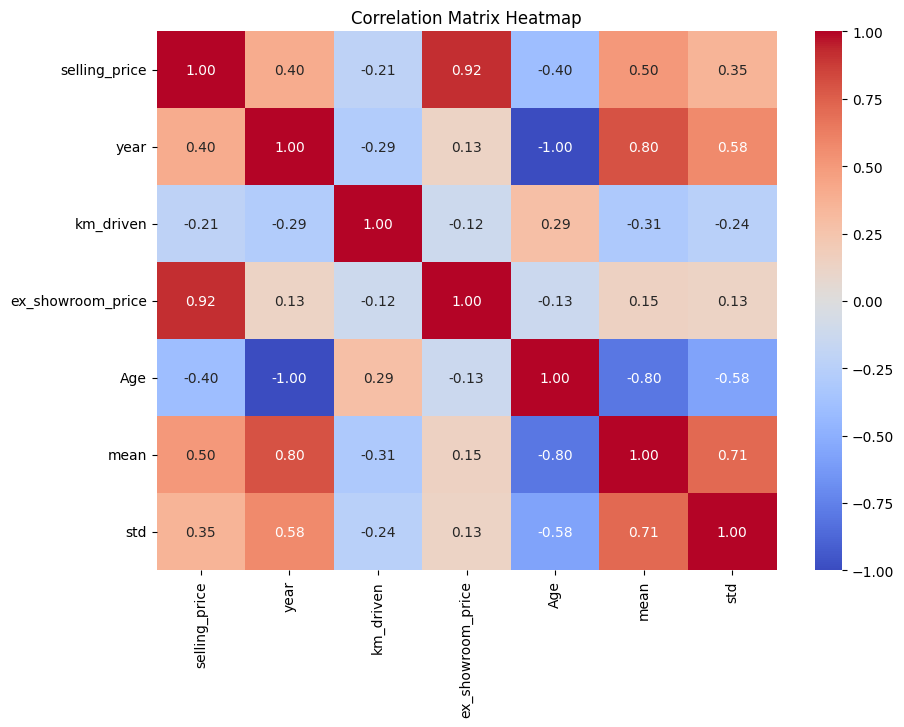

In [19]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap
# Assuming df1 is your dataframe
numeric_cols = df1.select_dtypes(include='number')  # selects only numeric columns
corr_matrix = numeric_cols.corr()                   # compute correlation matrix

print(corr_matrix)

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



In [20]:
df2=pd.read_csv("Car Sale.csv")

In [21]:
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [24]:
#1.What is the average selling price of cars for each dealer, and how does it compare across different dealers
df2.groupby("Dealer_Name")["Price ($)"].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [26]:
#2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
price_variation = df2.groupby('Company')['Price ($)'].std().reset_index()
price_variation.rename(columns={'Price ($)': 'Price_STD'}, inplace=True)
price_variation = price_variation.sort_values(by='Price_STD', ascending=False)
print(price_variation.head(5))

     Company     Price_STD
15   Lincoln  19658.050211
24      Saab  19653.740089
4   Cadillac  19517.120220
21  Plymouth  19065.997338
14     Lexus  17852.923492


                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max      IQR  
Transmission                             
Auto          35500.0  75700.0  16500.0  
Manual        34000.0  85800.0  17000.0  


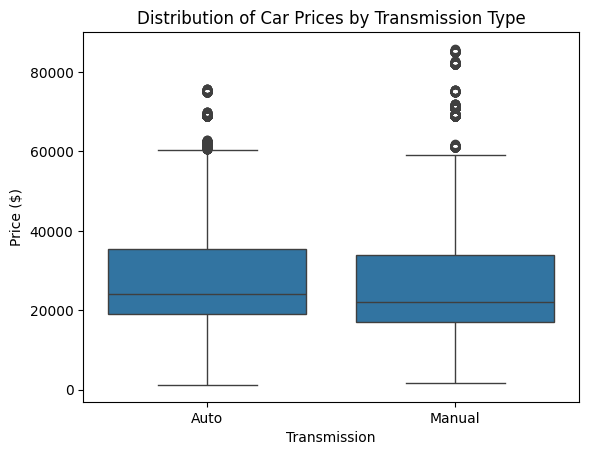

In [29]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
transmission_stats = df2.groupby('Transmission')['Price ($)'].describe()
transmission_stats['IQR'] = transmission_stats['75%'] - transmission_stats['25%']

print(transmission_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']])
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max      IQR  
Dealer_Region                             
Aurora         35000.0  85800.0  16999.0  
Austin         35001.0  85601.0  17000.0  
Greenville     34500.0  85200.0  16499.0  
Janesville     34000.0  85400.0  15999.0  
Middletown     34000.0  85300.

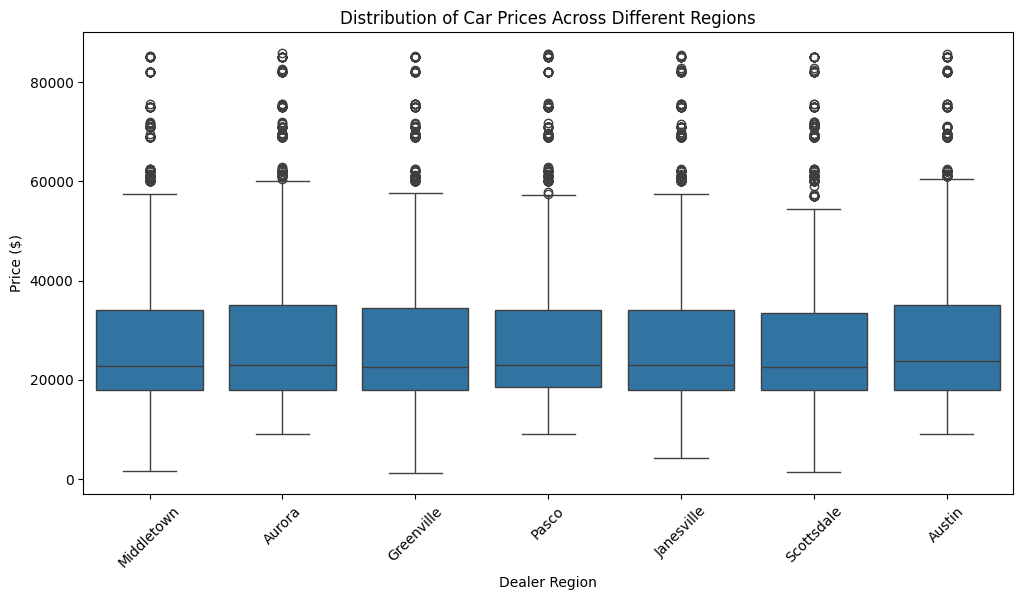

In [30]:
#4.What is the distribution of car prices across different regions
region_price_stats = df2.groupby('Dealer_Region')['Price ($)'].describe()
region_price_stats['IQR'] = region_price_stats['75%'] - region_price_stats['25%']

print(region_price_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']])
plt.figure(figsize=(12,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices Across Different Regions')
plt.ylabel('Price ($)')
plt.xlabel('Dealer Region')
plt.xticks(rotation=45)
plt.show()


  Body_Style  Count
0        SUV   6374
1  Hatchback   6128
2      Sedan   4488
3  Passenger   3945
4    Hardtop   2971


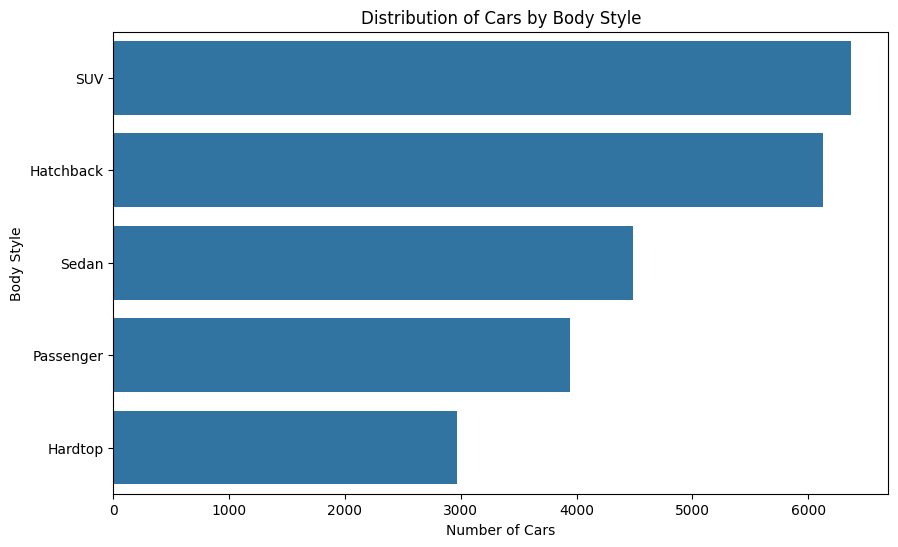

In [31]:
#5.What is the distribution of cars based on body styles
body_style_counts = df2['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['Body_Style', 'Count']
print(body_style_counts)

plt.figure(figsize=(10,6))
sns.countplot(y='Body Style', data=df2, order=df2['Body Style'].value_counts().index)
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Number of Cars')
plt.ylabel('Body Style')
plt.show()

    Gender Income_Bin  Avg_Selling_Price
0   Female      0-30k       28132.038732
1   Female    30k-60k                NaN
2   Female    60k-90k                NaN
3   Female   90k-120k       46001.000000
4   Female  120k-150k       20000.000000
5   Female      150k+       28316.441814
6     Male      0-30k       27816.302247
7     Male    30k-60k                NaN
8     Male    60k-90k       43000.000000
9     Male   90k-120k                NaN
10    Male  120k-150k       16666.666667
11    Male      150k+       28103.754282


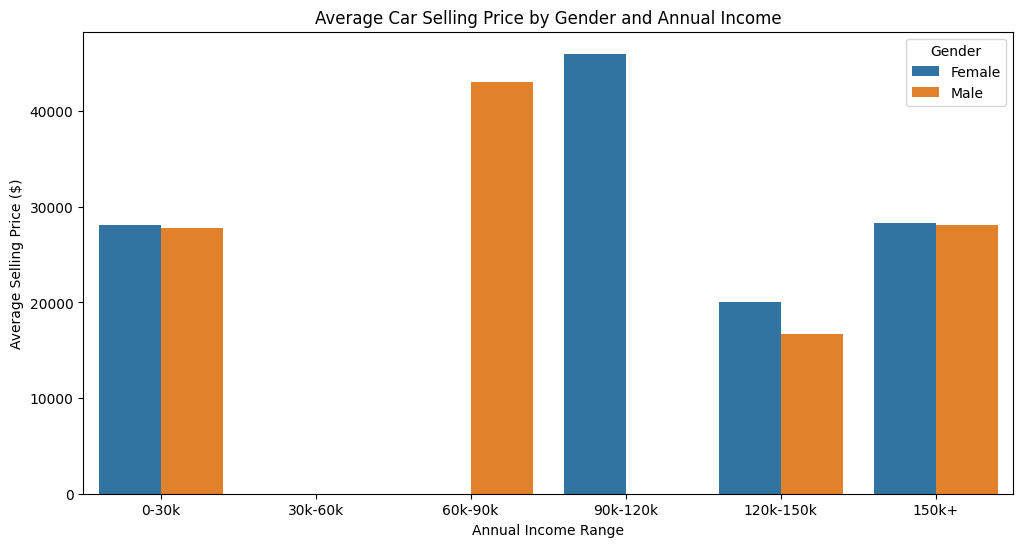

In [32]:
#6.How does the average selling price of cars vary by customer gender and annual income?
bins = [0, 30000, 60000, 90000, 120000, 150000, df2['Annual Income'].max()]
labels = ['0-30k','30k-60k','60k-90k','90k-120k','120k-150k','150k+']
df2['Income_Bin'] = pd.cut(df2['Annual Income'], bins=bins, labels=labels)
avg_price_gender_income = df2.groupby(['Gender', 'Income_Bin'])['Price ($)'].mean().reset_index()
avg_price_gender_income.rename(columns={'Price ($)': 'Avg_Selling_Price'}, inplace=True)

print(avg_price_gender_income)
plt.figure(figsize=(12,6))
sns.barplot(x='Income_Bin', y='Avg_Selling_Price', hue='Gender', data=avg_price_gender_income)
plt.title('Average Car Selling Price by Gender and Annual Income')
plt.ylabel('Average Selling Price ($)')
plt.xlabel('Annual Income Range')
plt.show()

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max      IQR  
Dealer_Region                             
Aurora         35000.0  85800.0  16999.0  
Austin         35001.0  85601.0  17000.0  
Greenville     34500.0  85200.0  16499.0  
Janesville     34000.0  85400.0  15999.0  
Middletown     34000.0  85300.

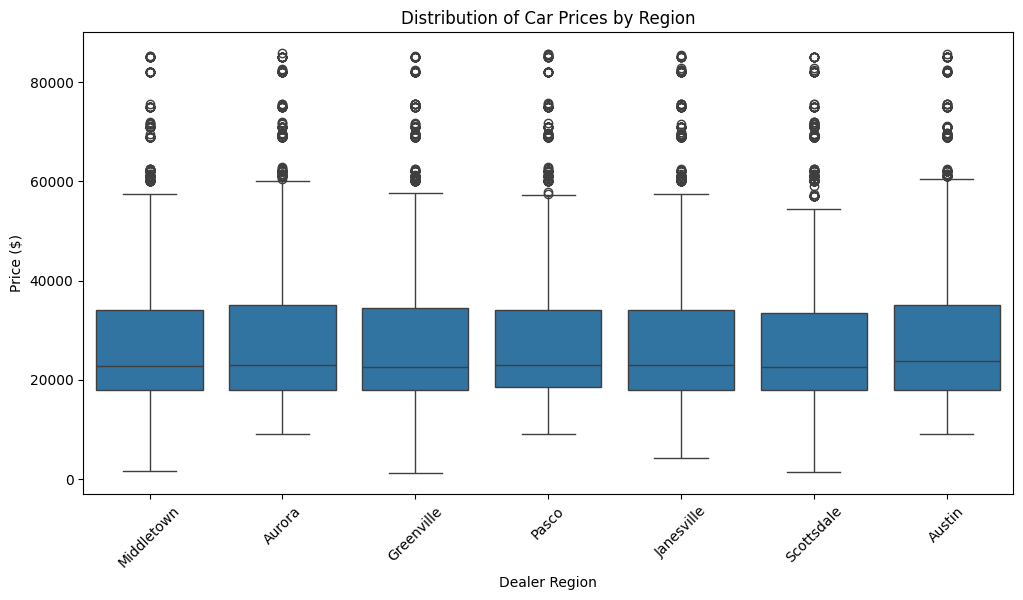

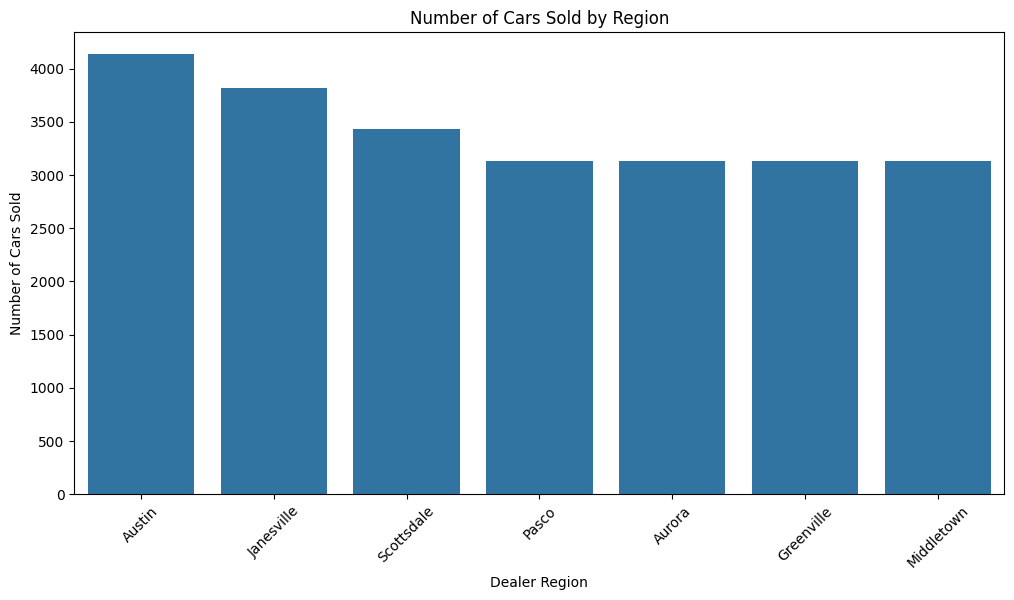

In [33]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region
region_price_stats = df2.groupby('Dealer_Region')['Price ($)'].describe()
region_price_stats['IQR'] = region_price_stats['75%'] - region_price_stats['25%']

print(region_price_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']])
cars_sold_by_region = df2['Dealer_Region'].value_counts().reset_index()
cars_sold_by_region.columns = ['Dealer_Region', 'Number_of_Cars_Sold']

print(cars_sold_by_region)
plt.figure(figsize=(12,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12,6))
sns.barplot(x='Dealer_Region', y='Number_of_Cars_Sold', data=cars_sold_by_region)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

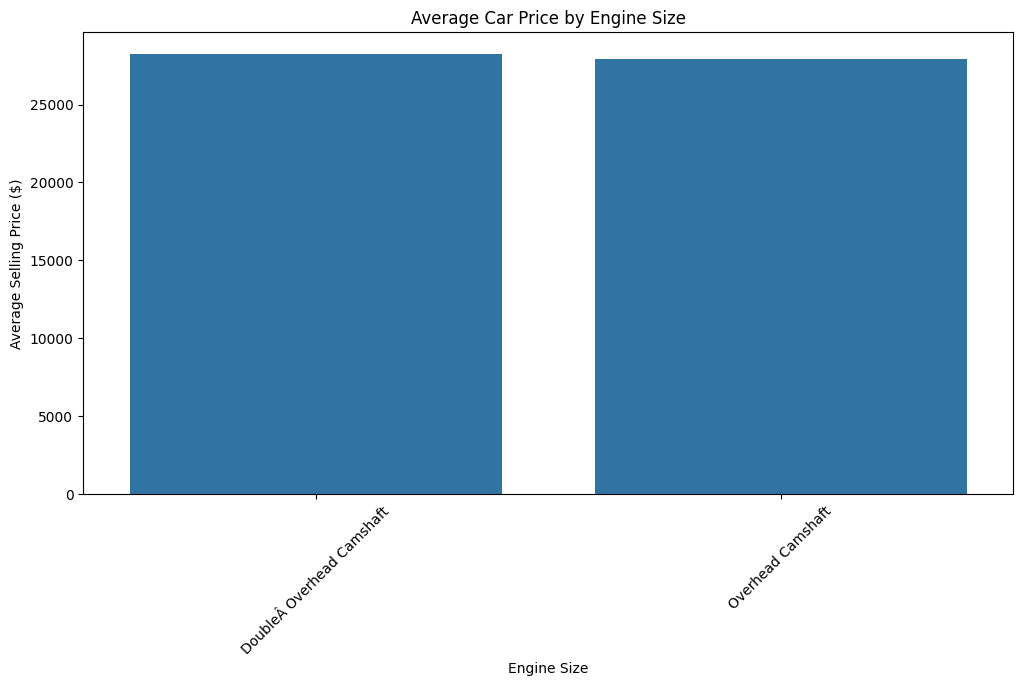

In [34]:
#8.How does the average car price differ between cars with different engine sizes
avg_price_by_engine = df2.groupby('Engine')['Price ($)'].mean().reset_index()
avg_price_by_engine.rename(columns={'Price ($)': 'Avg_Selling_Price'}, inplace=True)


avg_price_by_engine = avg_price_by_engine.sort_values(by='Avg_Selling_Price', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Engine', y='Avg_Selling_Price', data=avg_price_by_engine)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45)
plt.show()

  Income_Bracket  Avg_Selling_Price
0          0-30k       27884.297820
1        30k-60k                NaN
2        60k-90k       43000.000000
3       90k-120k       46001.000000
4      120k-150k       17500.000000
5          150k+       28149.089557


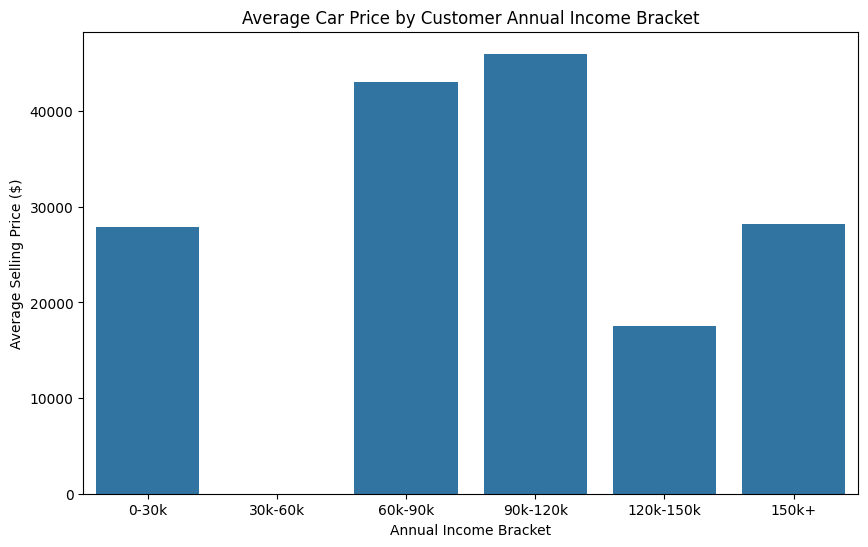

In [35]:
#9.How do car prices vary based on the customer’s annual income bracket
bins = [0, 30000, 60000, 90000, 120000, 150000, df2['Annual Income'].max()]
labels = ['0-30k','30k-60k','60k-90k','90k-120k','120k-150k','150k+']


df2['Income_Bracket'] = pd.cut(df2['Annual Income'], bins=bins, labels=labels)
avg_price_by_income = df2.groupby('Income_Bracket')['Price ($)'].mean().reset_index()
avg_price_by_income.rename(columns={'Price ($)': 'Avg_Selling_Price'}, inplace=True)

print(avg_price_by_income)
plt.figure(figsize=(10,6))
sns.barplot(x='Income_Bracket', y='Avg_Selling_Price', data=avg_price_by_income)
plt.title('Average Car Price by Customer Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Selling Price ($)')
plt.show()


        Model  Number_of_Sales
0    Diamante              418
1       Prizm              411
2  Silhouette              411
3      Passat              391
4  Ram Pickup              383


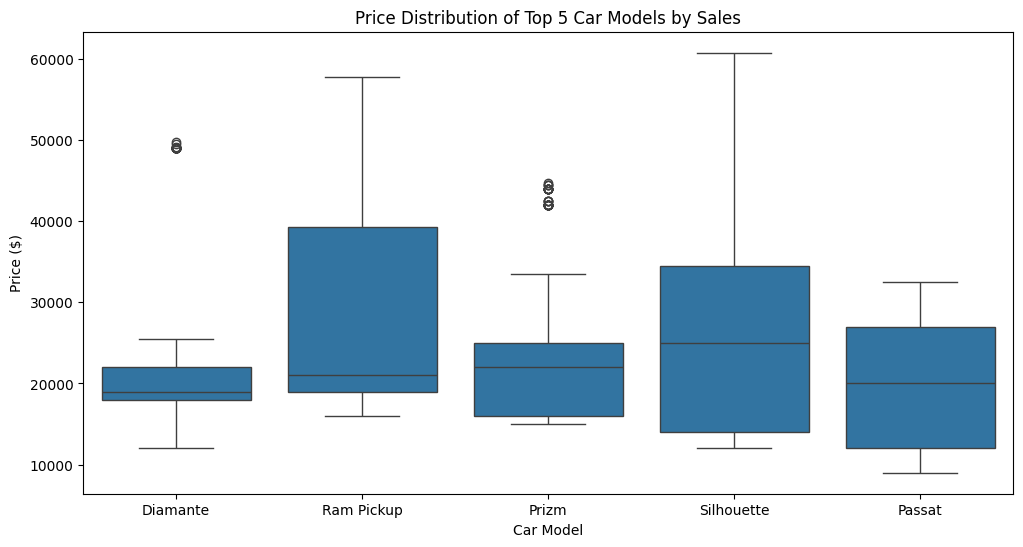

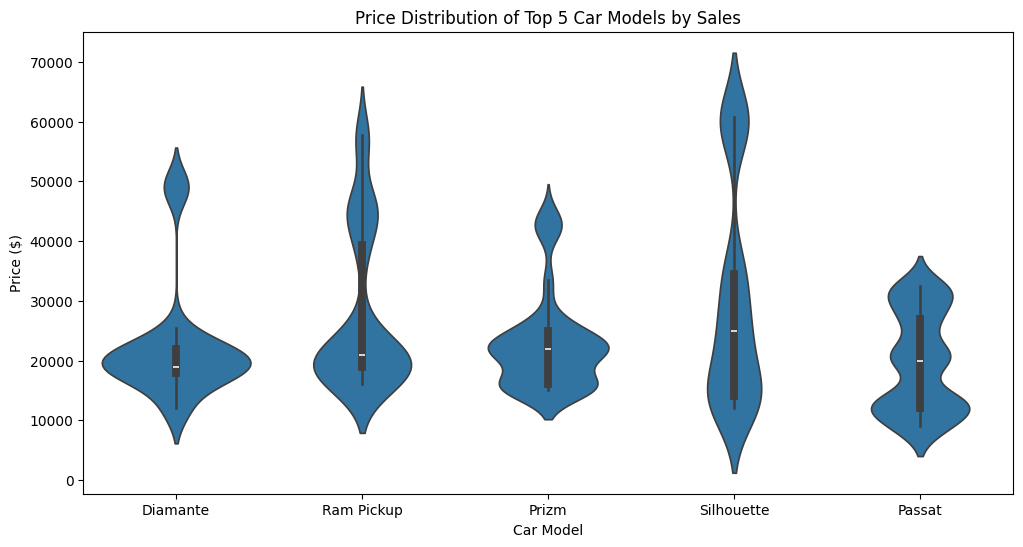

In [36]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look
model_sales = df2['Model'].value_counts().reset_index()
model_sales.columns = ['Model', 'Number_of_Sales']
top5_models=model_sales.head(5)
print(top5_models)
top_models_list = top5_models['Model'].tolist()
top_models_data = df2[df2['Model'].isin(top_models_list)]
plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_data)
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.show()
plt.figure(figsize=(12,6))
sns.violinplot(x='Model', y='Price ($)', data=top_models_data)
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.show()

                      Engine       Color     Avg_Price     Price_STD
0  DoubleÂ Overhead Camshaft       Black  25766.451103  12418.674126
1  DoubleÂ Overhead Camshaft  Pale White  30347.987460  14402.413401
2  DoubleÂ Overhead Camshaft         Red  27434.392314  13499.354247
3          Overhead Camshaft       Black  31732.967164  17457.405345
4          Overhead Camshaft  Pale White  24327.767694  13000.103061
5          Overhead Camshaft         Red  30153.405229  17346.642554
        Color     Price_STD
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


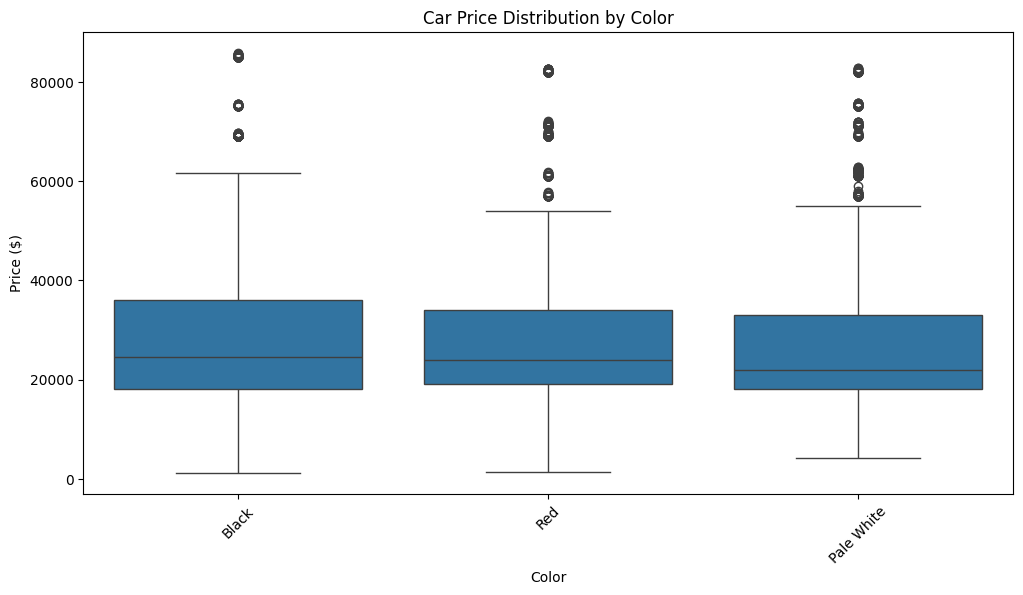

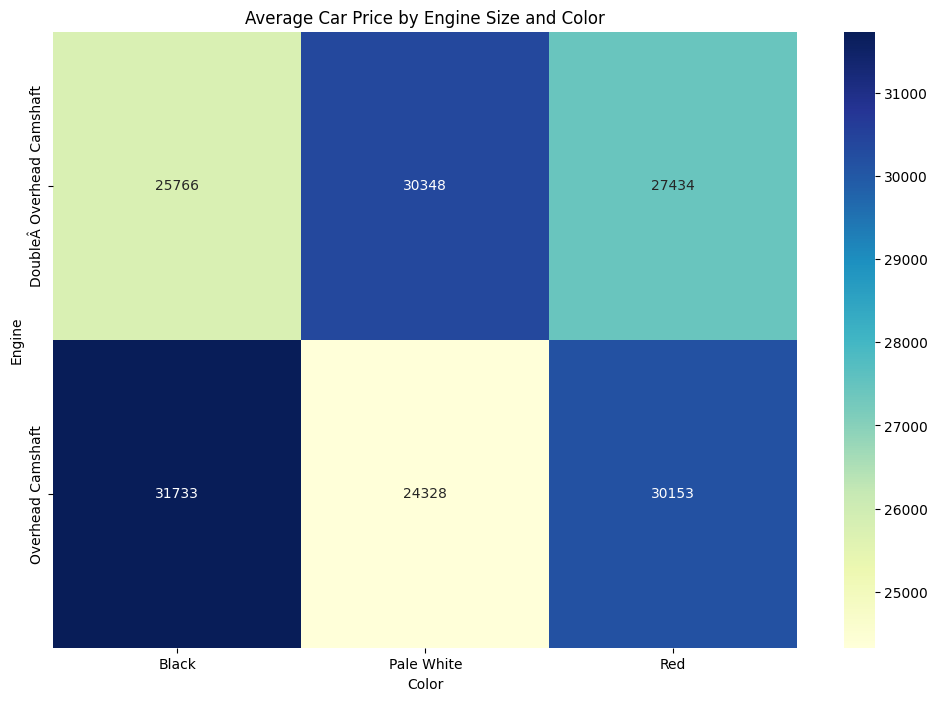

In [37]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation
engine_color_stats = df2.groupby(['Engine', 'Color'])['Price ($)'].agg(['mean','std']).reset_index()
engine_color_stats.rename(columns={'mean':'Avg_Price','std':'Price_STD'}, inplace=True)

print(engine_color_stats.head(10))
color_variation = df2.groupby('Color')['Price ($)'].std().reset_index()
color_variation.rename(columns={'Price ($)': 'Price_STD'}, inplace=True)


color_variation = color_variation.sort_values(by='Price_STD', ascending=False)
print(color_variation.head(5))

plt.figure(figsize=(12,6))
sns.boxplot(x='Color', y='Price ($)', data=df2)
plt.title('Car Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()
engine_color_pivot = df2.pivot_table(index='Engine', columns='Color', values='Price ($)', aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(engine_color_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Car Price by Engine Size and Color')
plt.show()


    Month  Number_of_Sales
0       1              790
1       2              735
2       3             1535
3       4             1655
4       5             1895
5       6             1715
6       7             1725
7       8             1705
8       9             3305
9      10             1830
10     11             3470
11     12             3546


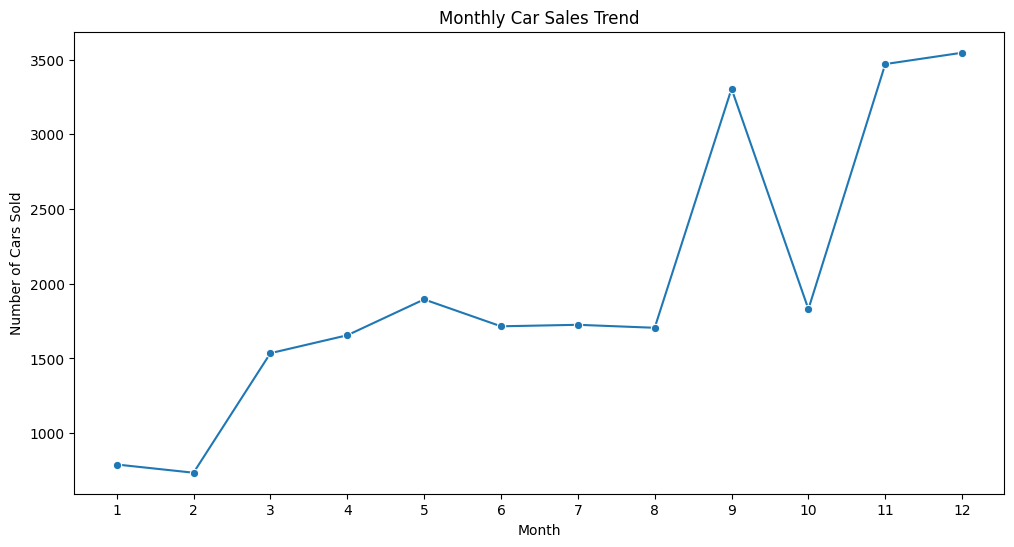

In [38]:
#12.Is there any seasonal trend in car sales based on the date of sale
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year
monthly_sales = df2.groupby('Month')['Car_id'].count().reset_index()
monthly_sales.rename(columns={'Car_id': 'Number_of_Sales'}, inplace=True)
print(monthly_sales)
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Number_of_Sales', data=monthly_sales, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1,13))
plt.show()

  Body Style Transmission          mean           std  count    min      q25  \
0    Hardtop         Auto  31520.188210  13687.756740   1408  12000  21001.0   
1    Hardtop       Manual  27016.943698  14072.501848   1563  11000  17575.5   
2  Hatchback         Auto  25910.544824  13144.014337   3458   4200  18001.0   
3  Hatchback       Manual  28702.550562  16284.049616   2670   1700  17000.0   
4  Passenger         Auto  28915.835149  13946.481932   2020   9000  19000.0   
5  Passenger       Manual  28969.521039  18523.684163   1925  10000  16001.0   
6        SUV         Auto  27501.404407  13299.927913   3086   1200  19000.0   
7        SUV       Manual  26079.019161  14621.526541   3288   2200  17000.0   
8      Sedan         Auto  29955.294344  14310.910860   2599  12000  19000.0   
9      Sedan       Manual  29664.271572  15440.056434   1889  11000  19001.0   

    median      q75    max      IQR  
0  27000.0  43125.0  75501  22124.0  
1  22001.0  29000.0  82500  11424.5  
2  21

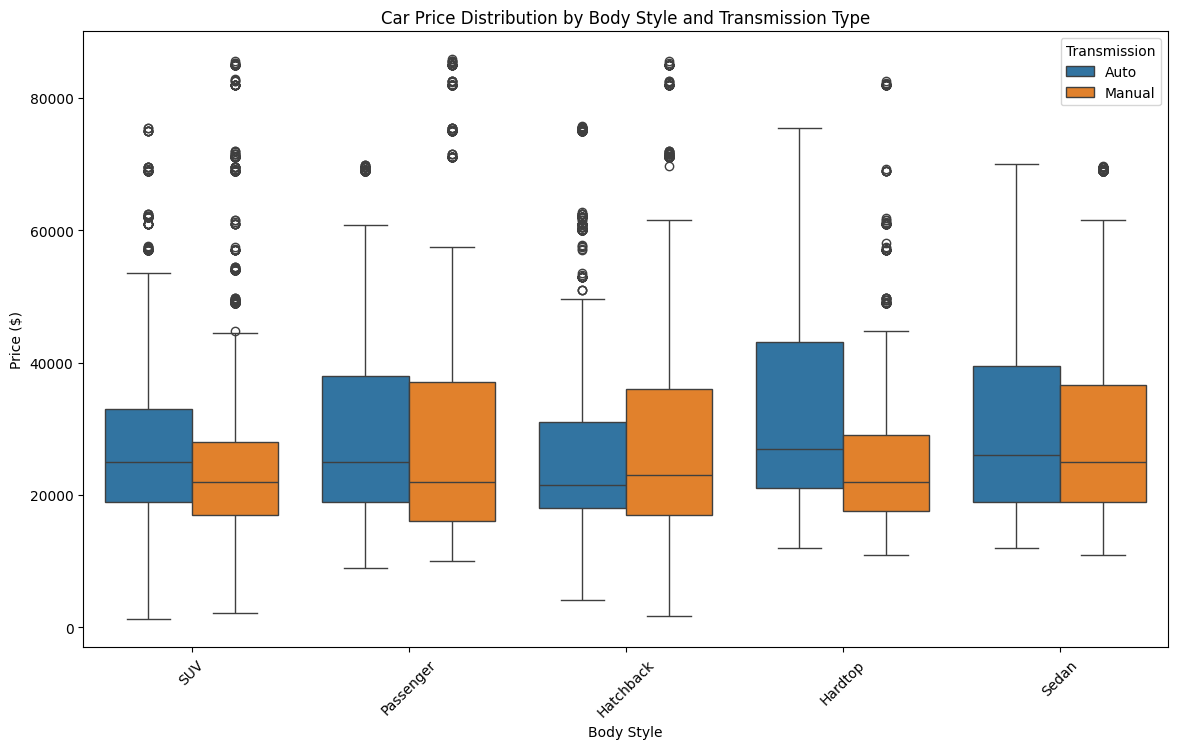

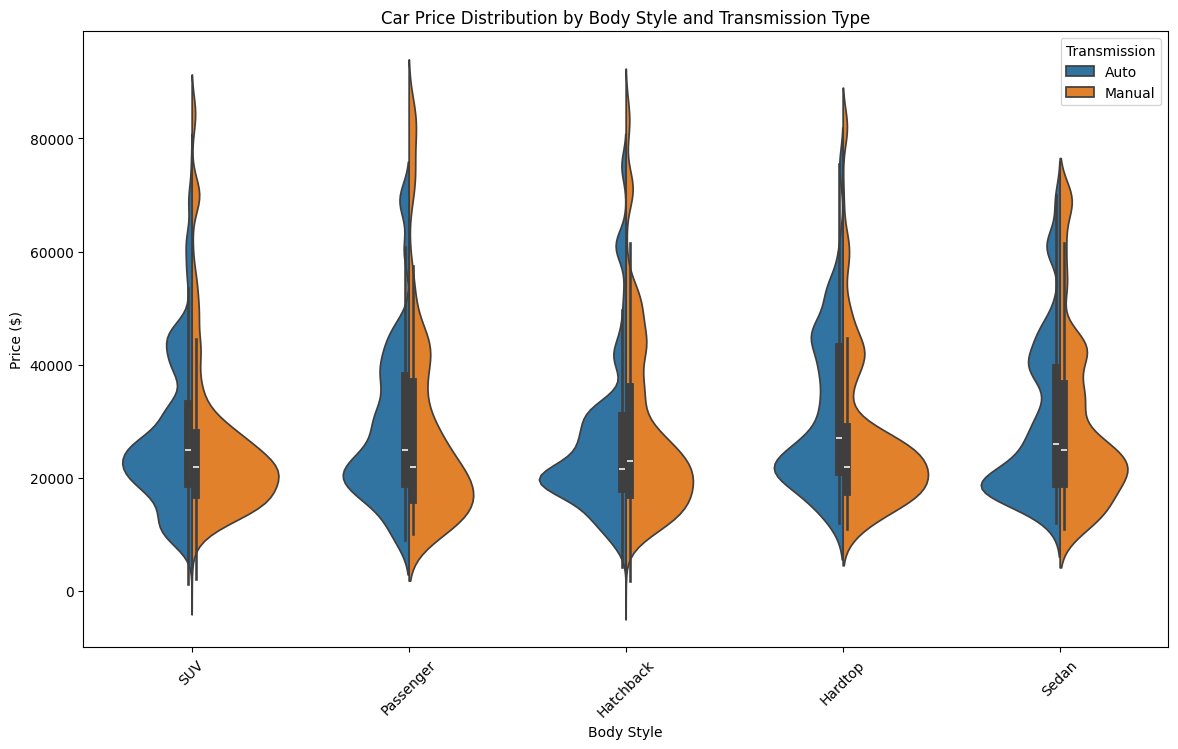

In [41]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
body_trans_stats = (
    df2.groupby(['Body Style', 'Transmission'])['Price ($)']
    .agg(
        mean='mean',
        std='std',
        count='count',
        min='min',
        q25=lambda x: x.quantile(0.25),
        median='median',
        q75=lambda x: x.quantile(0.75),
        max='max'
    )
    .reset_index()
)

body_trans_stats['IQR'] = body_trans_stats['q75'] - body_trans_stats['q25']

print(body_trans_stats)
plt.figure(figsize=(14,8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(14,8))
sns.violinplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2, split=True)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

               Price ($)  Engine_Size  Annual Income
Price ($)       1.000000          NaN       0.012065
Engine_Size          NaN          NaN            NaN
Annual Income   0.012065          NaN       1.000000


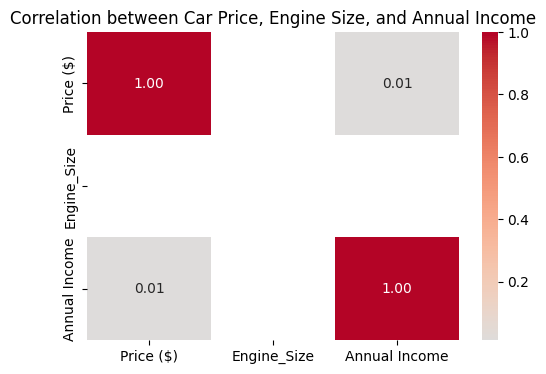

In [48]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
def parse_engine(value):
    value = str(value).lower().strip()
    match = re.findall(r"[\d.]+", value)
    if not match:
        return np.nan
    num = float(match[0])
    if "l" in value and "cc" not in value:
        return num * 1000  # liters → cc
    return num

df2["Engine_Size"] = df2["Engine"].apply(parse_engine)

corr = df2[["Price ($)", "Engine_Size", "Annual Income"]].corr()
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation between Car Price, Engine Size, and Annual Income")
plt.show()

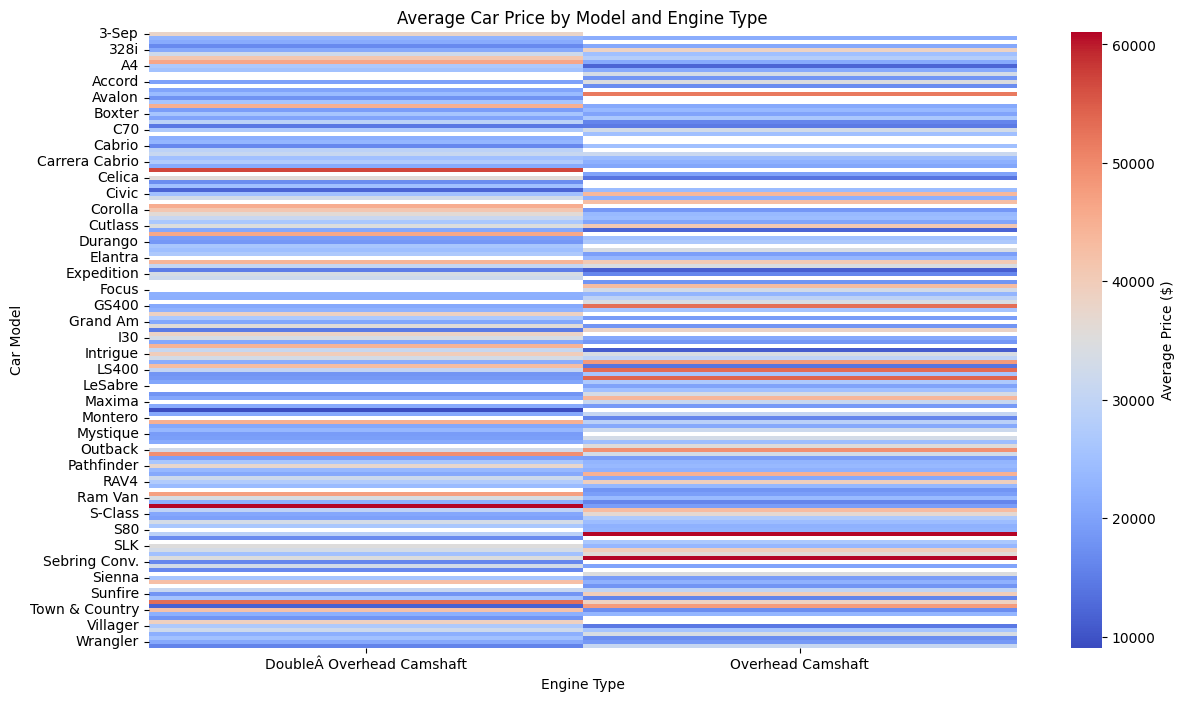

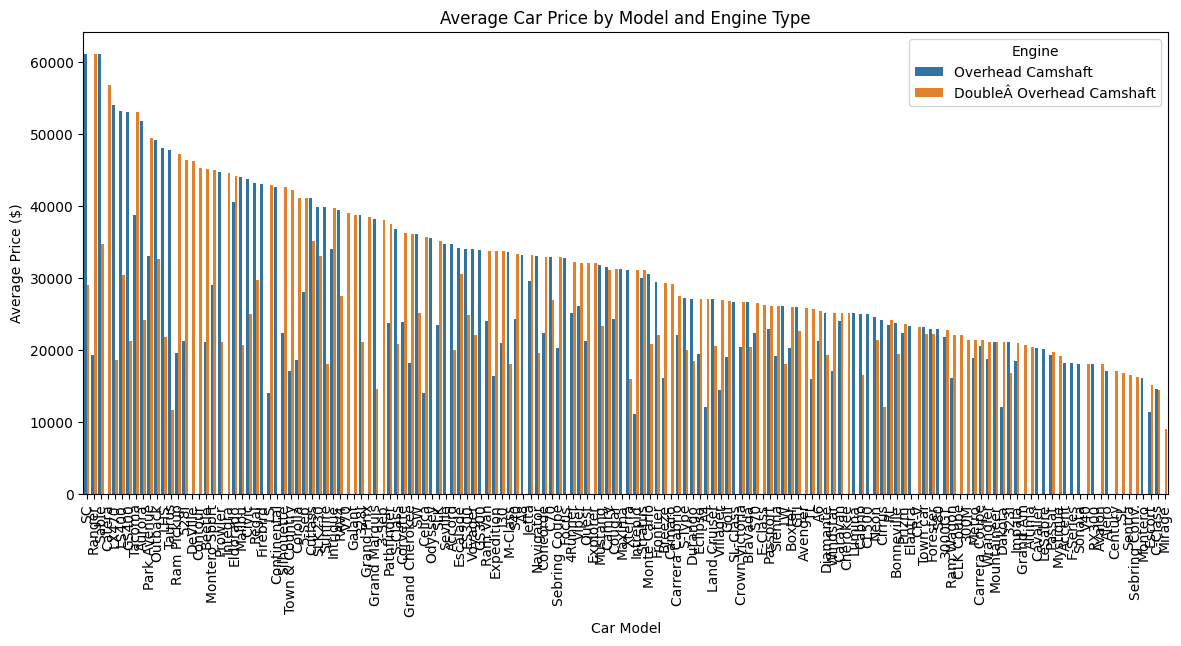

In [49]:
#15.How does the average car price vary across different car models and engine types
avg_price_model_engine = (
    df2.groupby(['Model', 'Engine'])['Price ($)']
    .mean()
    .reset_index()
    .sort_values(by='Price ($)', ascending=False)
)
pivot_table = avg_price_model_engine.pivot(index='Model', columns='Engine', values='Price ($)')

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", cbar_kws={'label': 'Average Price ($)'})
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Car Model")
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x='Model', y='Price ($)', hue='Engine', data=avg_price_model_engine)
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Car Model")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)
plt.show()

In [50]:
df3=pd.read_csv("amazon.csv")

In [51]:
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [62]:
df3['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [63]:
#1.What is the average rating for each product category
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
df3.groupby('category')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)


,category,rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
38,Computers&Accessories|Components|Memory,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
...,...,...
3,Computers&Accessories|Accessories&Peripherals|...,3.6
88,"Electronics|HomeTheater,TV&Video|Accessories|3...",3.5
2,Computers&Accessories|Accessories&Peripherals|...,3.5
14,Computers&Accessories|Accessories&Peripherals|...,3.4


In [64]:
#2.What are the top rating_count products by category?


rating_count = (
    df3.groupby(['category', 'product_name'])['rating']
      .count()
      .reset_index(name='rating_count')
)


top_rating_products = (
    rating_count.loc[rating_count.groupby('category')['rating_count'].idxmax()]
    .sort_values(by='rating_count', ascending=False)
)

print(top_rating_products)

                                               category  \
806         Electronics|WearableTechnology|SmartWatches   
772   Electronics|Mobiles&Accessories|Smartphones&Ba...   
22    Computers&Accessories|Accessories&Peripherals|...   
376         Electronics|Accessories|MemoryCards|MicroSD   
476   Electronics|Headphones,Earbuds&Accessories|Hea...   
...                                                 ...   
1327  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1329  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1331  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1333  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1336  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
806   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5  
772   Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...             3  
22    Amazon Basics USB Type-C to USB-A 2.0 Male Fas...             3  
376

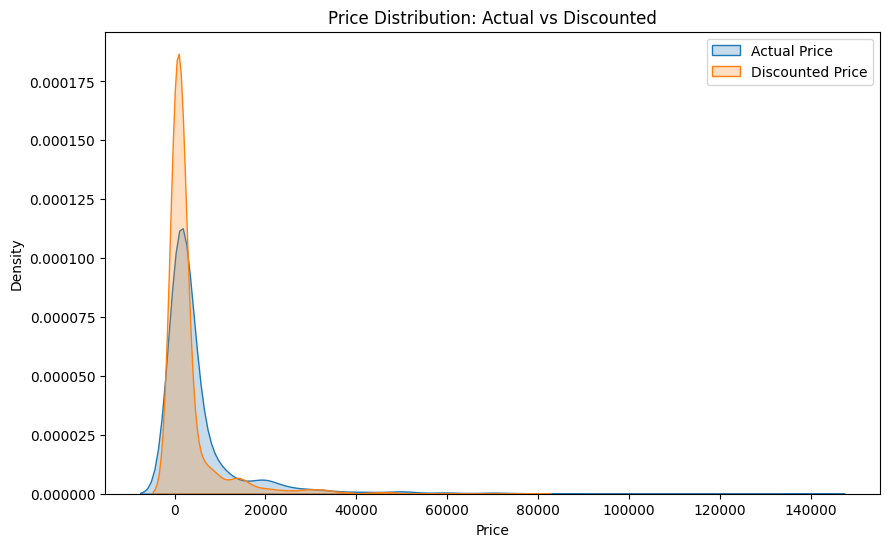

In [68]:
#3.What is the distribution of discounted prices vs. actual prices
df3['actual_price'] = df3['actual_price'].replace('[₹$,]', '', regex=True).astype(float)
df3['discounted_price'] = df3['discounted_price'].replace('[₹$,]', '', regex=True).astype(float)
df3[['actual_price', 'discounted_price']].describe()
plt.figure(figsize=(10,6))
sns.kdeplot(df3['actual_price'], label="Actual Price", shade=True)
sns.kdeplot(df3['discounted_price'], label="Discounted Price", shade=True)
plt.legend()
plt.title("Price Distribution: Actual vs Discounted")
plt.xlabel("Price")
plt.show()

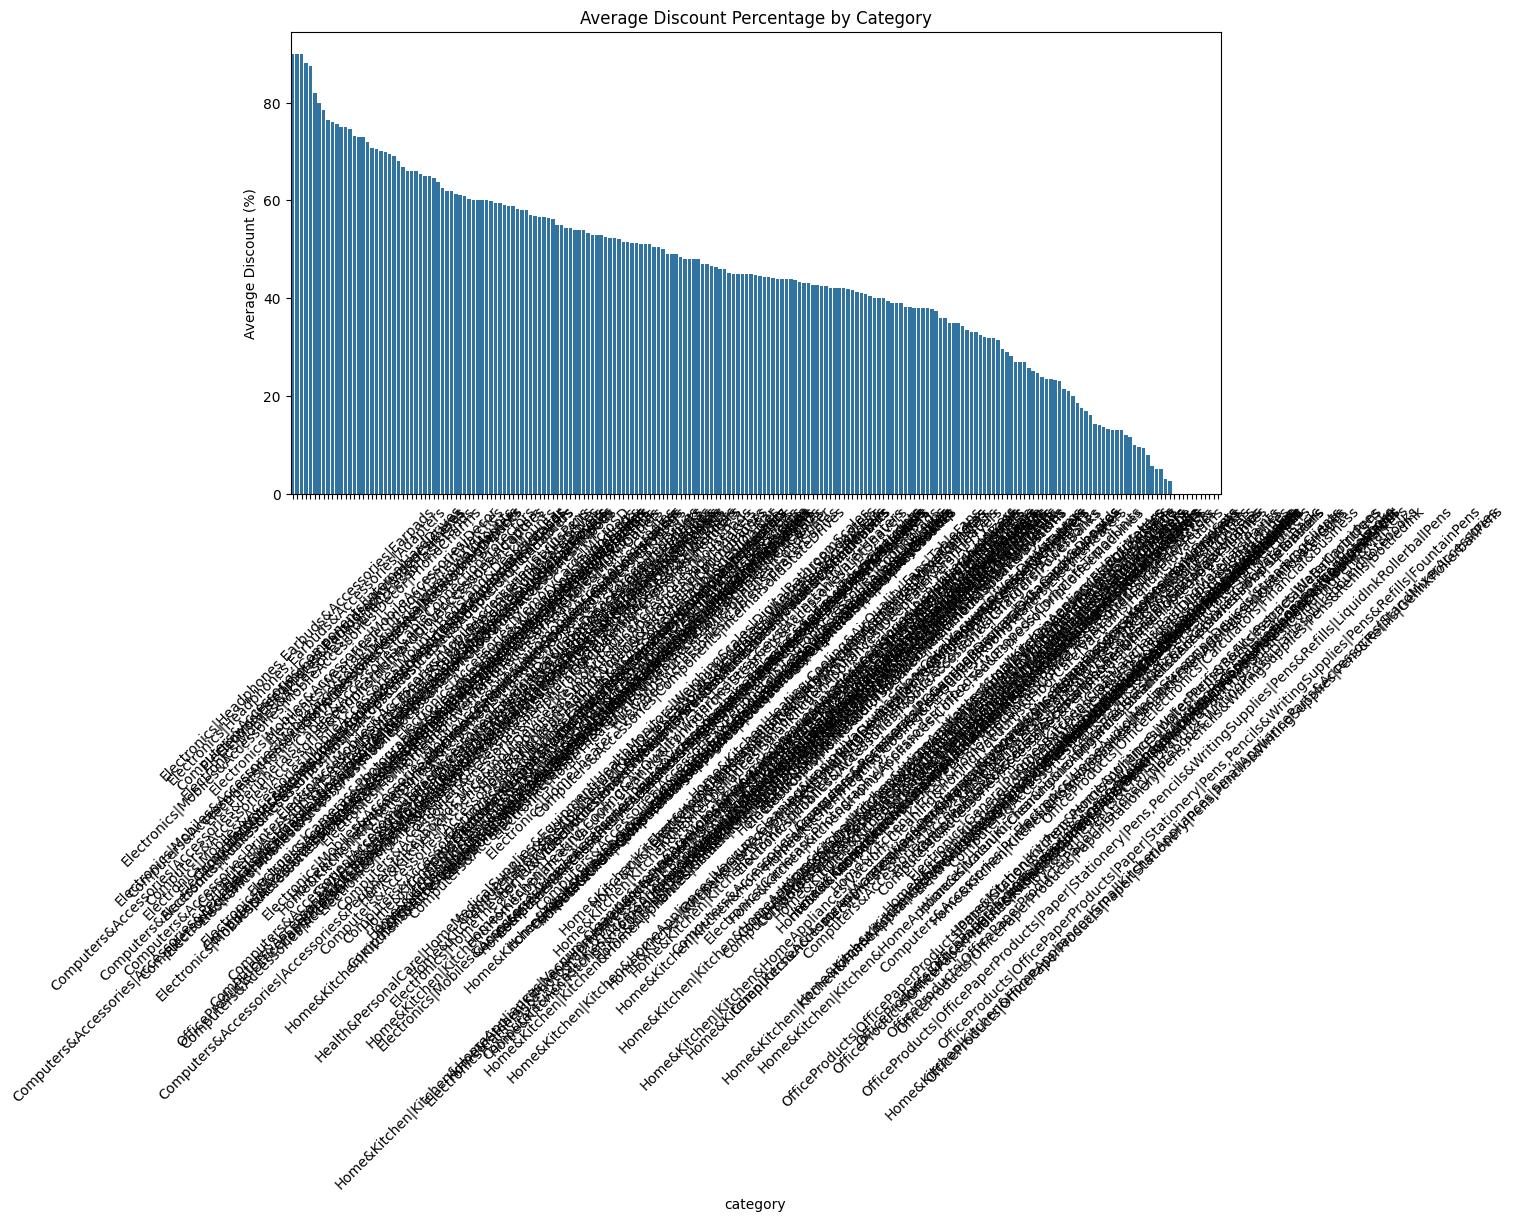

In [75]:
#4.How does the average discount percentage vary across categories?

df3['discount_percentage'] = df3['discount_percentage'].str.replace('%', '', regex=False).astype(float)

avg_discount_by_category = df3.groupby('category')['discount_percentage'].mean().reset_index()
avg_discount_by_category.rename(columns={'discount_percentage': 'avg_discount_percentage'}, inplace=True)
avg_discount_by_category = avg_discount_by_category.sort_values(by='avg_discount_percentage', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=avg_discount_by_category, x='category', y='avg_discount_percentage')
plt.xticks(rotation=45)
plt.ylabel('Average Discount (%)')
plt.title('Average Discount Percentage by Category')
plt.show()


In [79]:
# 5. What are the most popular product names
df3['rating_count'] = pd.to_numeric(df3['rating_count'], errors='coerce')

popularity_by_product = df3.groupby('product_name')['rating_count'].sum().reset_index()
most_popular_products = popularity_by_product.sort_values(by='rating_count', ascending=False)
most_popular_products.head(10)


,product_name,rating_count
325,Duracell USB Lightning Apple Certified (Mfi) B...,2445.0
1237,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,1948.0
121,Ambrane 2 in 1 Type-C & Micro USB Cable with 6...,1806.0
1179,Wecool Unbreakable 3 in 1 Charging Cable with ...,1312.0
1022,"Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...",1151.0
947,SWAPKART Fast Charging Cable and Data Sync USB...,1072.0
363,Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
365,Eveready Red 1012 AAA Batteries - Pack of 10,989.0
807,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976.0
1239,Zoul USB Type C Fast Charging 3A Nylon Braided...,974.0


In [80]:
#6. What are the most popular product keywords?
from collections import Counter
import re

all_product_names = ' '.join(df3['product_name']).lower()
words = re.findall(r'\b\w+\b', all_product_names)
word_counts = Counter(words)
stopwords = {'the', 'and', 'with', 'for', 'in', 'of', 'a', 'on', 'to', 'pack', 'set', 'size'}
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

popular_keywords = Counter(filtered_word_counts).most_common(20)
popular_keywords


[('black', 530),
 ('usb', 417),
 ('cable', 414),
 ('1', 413),
 ('c', 289),
 ('3', 275),
 ('2', 267),
 ('charging', 247),
 ('type', 243),
 ('fast', 212),
 ('smart', 175),
 ('white', 170),
 ('tv', 152),
 ('compatible', 146),
 ('5', 137),
 ('data', 136),
 ('hd', 135),
 ('4', 133),
 ('led', 129),
 ('8', 125)]

In [84]:
#7.What are the most popular product reviews?
# Convert rating_count and rating to numeric
df3['rating_count'] = pd.to_numeric(df3['rating_count'], errors='coerce')
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
top_products = df3.groupby('product_name')['rating_count'].sum().reset_index()
top_products = top_products.sort_values(by='rating_count', ascending=False)

top_reviews = df3[df3['product_name'].isin(top_products.head(10)['product_name'])]
top_reviews[['product_name', 'review_title', 'review_content', 'rating', 'rating_count']].head(10)


,product_name,review_title,review_content,rating,rating_count
20,Duracell USB Lightning Apple Certified (Mfi) B...,"Good cable for car,Good substitute for orginal...",I trust this product! Works well with car play...,4.5,815.0
32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...,4.3,974.0
37,"Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...","Worth it!,Good one,Robust and effective.,Good,...",It does the job really well. No complaints reg...,4.0,576.0
58,Wecool Unbreakable 3 in 1 Charging Cable with ...,"Nice,Awesome,Quick not charger🤏,Expensive at t...","Good,Got a nice product,Quick not charger🤏,Cab...",4.2,656.0
75,Ambrane 2 in 1 Type-C & Micro USB Cable with 6...,"Good product,Its good, but micro usb doesn't f...","Product is good , and also it's strudiness .B...",4.1,602.0
78,SWAPKART Fast Charging Cable and Data Sync USB...,"Value for money,Nice product,timely delivered ...",Packing is good .. they have sent a box for it...,3.9,536.0
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...,4.3,974.0
467,Duracell USB Lightning Apple Certified (Mfi) B...,"Good cable for car,Good substitute for orginal...",I trust this product! Works well with car play...,4.5,815.0
569,Ambrane 2 in 1 Type-C & Micro USB Cable with 6...,"Good product,Its good, but micro usb doesn't f...","Product is good , and also it's strudiness .B...",4.1,602.0
700,Duracell USB Lightning Apple Certified (Mfi) B...,"Good cable for car,Good substitute for orginal...",I trust this product! Works well with car play...,4.5,815.0


In [85]:
#8.What is the correlation between discounted_price and rating?
df_corr = df3[['discounted_price', 'rating']].dropna()
correlation = df_corr['discounted_price'].corr(df_corr['rating'])
correlation


np.float64(0.12033741712288548)

In [87]:
#9.What are the Top 5 categories based on the highest ratings?
avg_rating_by_category = df3.groupby('category')['rating'].mean().reset_index()
avg_rating_by_category.rename(columns={'rating': 'avg_rating'}, inplace=True)
top_categories = avg_rating_by_category.sort_values(by='avg_rating', ascending=False)
top_categories.head(5)

,category,avg_rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
38,Computers&Accessories|Components|Memory,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5


In [88]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.
df4=pd.read_csv("spotify.csv")

In [89]:
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [90]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [92]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
print(df4.isnull().sum())

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [94]:

df4.duplicated().sum()

np.int64(27)

In [96]:
df4.drop_duplicates(inplace=True)


In [98]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
df4['Popularity'].describe()

,Popularity
count,413.000000
mean,75.384988
std,9.789010
min,29.000000
25%,70.000000
50%,76.000000
75%,82.000000
max,97.000000


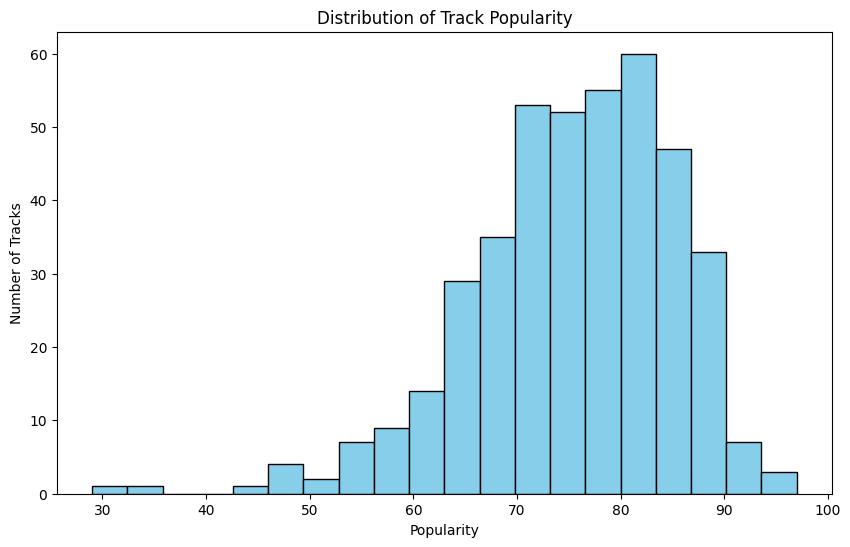

In [100]:
plt.figure(figsize=(10,6))
plt.hist(df4['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()


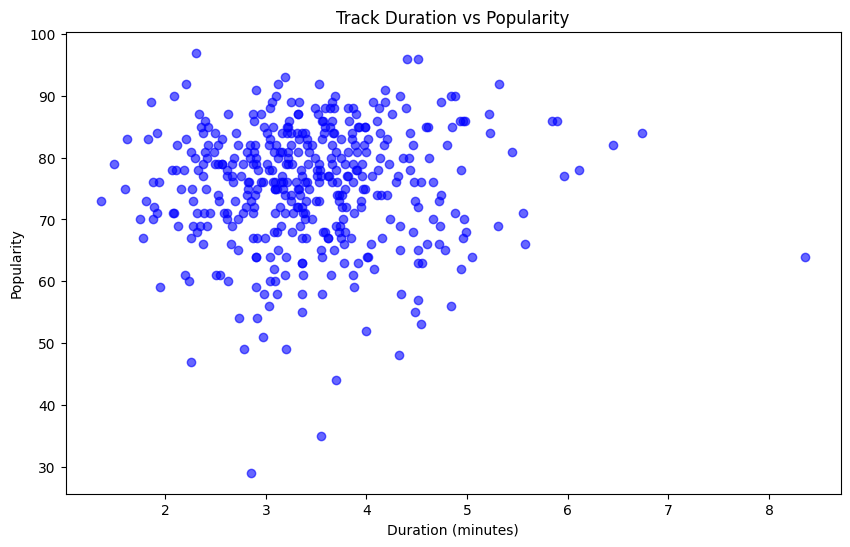

In [103]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
df4['Duration_min'] = df4['Duration (ms)'] / 60000

plt.figure(figsize=(10,6))
plt.scatter(df4['Duration_min'], df4['Popularity'], alpha=0.6, color='blue')
plt.title('Track Duration vs Popularity')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.show()

Artist
Drake           17
Eminem          11
Lil Nas X       10
JAY-Z           10
21 Savage       10
Flo Rida        10
¥$              10
Timbaland       10
Ludacris        10
Travis Scott     9
Name: count, dtype: int64


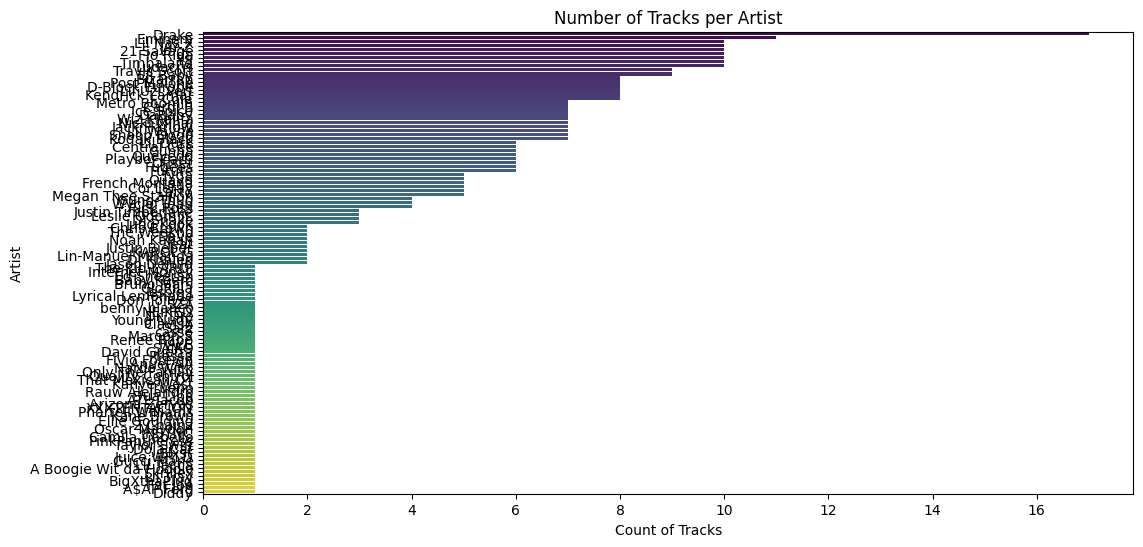

In [105]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
track_counts = df4['Artist'].value_counts()
print(track_counts.head(10))

plt.figure(figsize=(12,6))
sns.countplot(data=df4, y='Artist', order=df4['Artist'].value_counts().index, palette='viridis')
plt.title('Number of Tracks per Artist')
plt.xlabel('Count of Tracks')
plt.ylabel('Artist')
plt.show()


In [107]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df4.sort_values(by='Popularity', ascending=True).head(5)
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [109]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
avg_popularity_per_artist = df4.groupby('Artist')['Popularity'].mean().reset_index()
avg_popularity_per_artist.rename(columns={'Popularity': 'Avg_Popularity'}, inplace=True)
top_5_artists_by_tracks = df4['Artist'].value_counts().head(5).index
top_5_avg_popularity = avg_popularity_per_artist[avg_popularity_per_artist['Artist'].isin(top_5_artists_by_tracks)]
top_5_avg_popularity = top_5_avg_popularity.sort_values(by='Avg_Popularity', ascending=False)
top_5_avg_popularity


,Artist,Avg_Popularity
2,21 Savage,83.800000
33,Eminem,83.636364
29,Drake,82.882353
46,JAY-Z,77.900000
63,Lil Nas X,75.900000


In [111]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
top_5_artists = df4['Artist'].value_counts().head(5).index
top_artists_tracks = df4[df4['Artist'].isin(top_5_artists)]
most_popular_tracks = top_artists_tracks.loc[top_artists_tracks.groupby('Artist')['Popularity'].idxmax()]
most_popular_tracks = most_popular_tracks[['Artist', 'Track Name', 'Popularity']]
most_popular_tracks


,Artist,Track Name,Popularity
70,21 Savage,redrum,96
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
100,JAY-Z,Ni**as In Paris,86
312,Lil Nas X,THATS WHAT I WANT,81


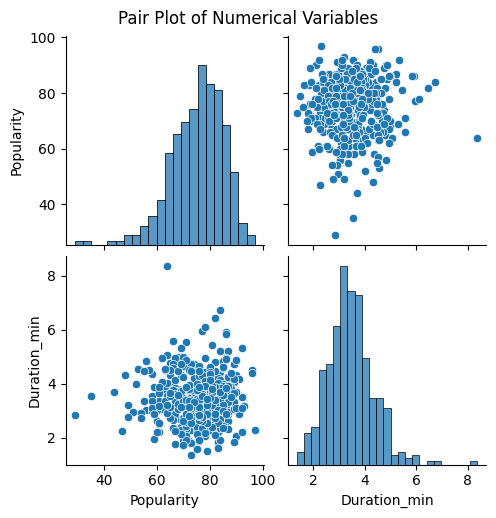

In [113]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot
df4['Duration_min'] = df4['Duration (ms)'] / 60000
numerical_df = df4[['Popularity', 'Duration_min']]
sns.pairplot(numerical_df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


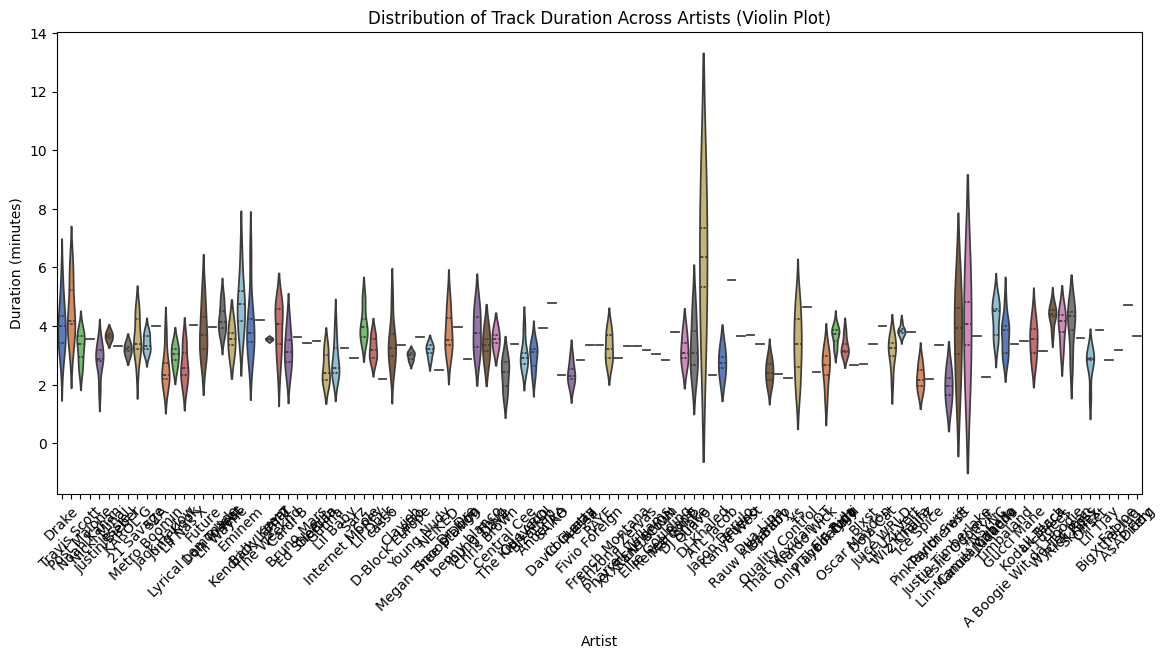

In [115]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
df4['Duration_min'] = df4['Duration (ms)'] / 60000
plt.figure(figsize=(14,6))
sns.violinplot(x='Artist', y='Duration_min', data=df4, inner='quartile', palette='muted')
plt.xticks(rotation=45)
plt.title('Distribution of Track Duration Across Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (minutes)')
plt.show()


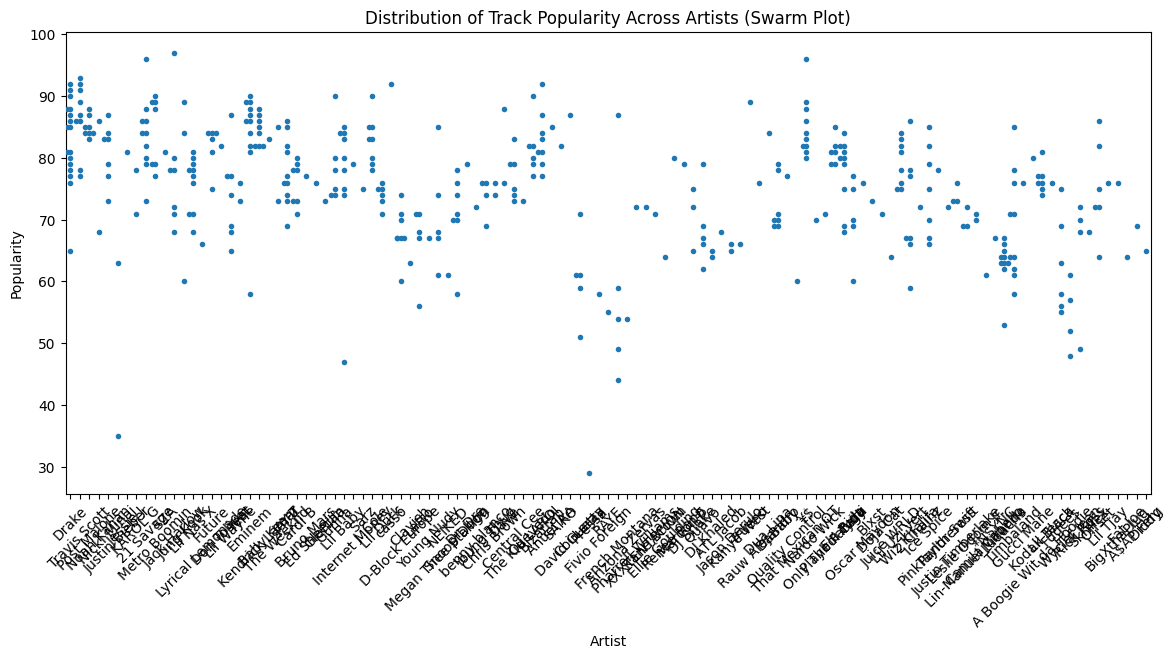

In [116]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(14,6))
sns.swarmplot(x='Artist', y='Popularity', data=df4, size=4)
plt.xticks(rotation=45)
plt.title('Distribution of Track Popularity Across Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()
